In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)
    
%matplotlib inline

import numpy as np
import pandas as pd
import os, sys
import scanpy as sc
import scanpy.external as sce
import pyreadr
import logging
from datetime import date


In [2]:
output_prefix = 'BladderCancerImmune'
analysis_out_path = os.path.join('../output', date.today().strftime('%Y%m%d'))
results_file = analysis_out_path + "_"+ f'{output_prefix}.h5ad'
sc.settings.set_figure_params(dpi=300)

In [3]:
logger = logging.getLogger()
logger.setLevel(logging.INFO)
log_info = logger.warning
sc.set_figure_params(dpi=300)
sc.settings.verbosity = 3
sc.logging.print_versions()

-----
anndata     0.7.4
scanpy      1.6.0
sinfo       0.3.1
-----
PIL                 7.2.0
anndata             0.7.4
backcall            0.2.0
cairo               1.19.1
cffi                1.14.1
colorama            0.4.3
concurrent          NA
cycler              0.10.0
cython_runtime      NA
dateutil            2.8.1
decorator           4.4.2
encodings           NA
genericpath         NA
get_version         2.1
google              NA
h5py                2.10.0
igraph              0.8.2
ipykernel           5.3.4
ipython_genutils    0.2.0
jedi                0.17.2
joblib              0.16.0
kiwisolver          1.2.0
legacy_api_wrap     0.0.0
leidenalg           0.8.1
llvmlite            0.34.0
matplotlib          3.3.1
mpl_toolkits        NA
natsort             7.0.1
ntpath              NA
numba               0.51.2
numexpr             2.7.1
numpy               1.19.1
opcode              NA
packaging           20.4
pandas              1.1.2
parso               0.7.1
pexpect         

In [4]:
adata = sc.read_h5ad("../output/20200914_BladderCancerImmune.h5ad")

In [8]:
meta_data = pyreadr.read_r("../output/20200915_singleR_pred.rds")

LibrdataError: The file contains an unrecognized object

In [30]:
meta_data.index = meta_data['barcode']

In [33]:
adata.obs

orig.ident sample  patient tissue  \
barcode                                                       
AAACCCAAGCACGGAT-1-0-0    PT21713-BT      0  PT21713     BT   
AAACCCAAGGACGCAT-1-0-0    PT21713-BT      0  PT21713     BT   
AAACCCAAGGGCGAAG-1-0-0    PT21713-BT      0  PT21713     BT   
AAACCCACAATACCTG-1-0-0    PT21713-BT      0  PT21713     BT   
AAACCCACAATCCTAG-1-0-0    PT21713-BT      0  PT21713     BT   
...                              ...    ...      ...    ...   
TTTGTTGCAAGTTGGG-1-17-17  PT22611-LN     17  PT22611     LN   
TTTGTTGCACTTGGCG-1-17-17  PT22611-LN     17  PT22611     LN   
TTTGTTGGTAGCTCGC-1-17-17  PT22611-LN     17  PT22611     LN   
TTTGTTGGTCGCTTAA-1-17-17  PT22611-LN     17  PT22611     LN   
TTTGTTGTCTCACGAA-1-17-17  PT22611-LN     17  PT22611     LN   

                          n_genes_by_counts  log1p_n_genes_by_counts  \
barcode                                                                
AAACCCAAGCACGGAT-1-0-0                 1596                 7.375882   
AAACCCAAGGACGCAT-1-0-0                 1497                 7.311886   
AAACCCAAGGGCGAAG-1-0-0                 2574                 7.853605   
AAACCCACAATACCTG-1-0-0                 1073                 6.979145   
AAACCCACAATCCTAG-1-0-0                 1505                 7.317212   
...                                     ...                      ...   
TTTGTTGCAAGTTGGG-1-17-17               1759                 7.473069   
TTTGTTGCACTTGGCG-1-17-17               5216                 8.559678   
TTTGTTGGTAGCTCGC-1-17-17                331                 5.805135   
TTTGTTGGTCGCTTAA-1-17-17                809                 6.697034   
TTTGTTGTCTCACGAA-1-17-17               3295                 8.100465   

                         total_counts  log1p_total_counts  \
barcode                                                     
AAACCCAAGCACGGAT-1-0-0         5699.0   8.648221015930176   
AAACCCAAGGACGCAT-1-0-0         4049.0   8.306471824645996   
AAACCCAAGGGCGAAG-1-0-0        12978.0   9.471088409423828   
AAACCCACAATACCTG-1-0-0         2113.0   7.656337261199951   
AAACCCACAATCCTAG-1-0-0         3566.0    8.17948055267334   
...                               ...                 ...   
TTTGTTGCAAGTTGGG-1-17-17       3985.0   8.290543556213379   
TTTGTTGCACTTGGCG-1-17-17      31082.0  10.344416618347168   
TTTGTTGGTAGCTCGC-1-17-17        541.0   6.295266151428223   
TTTGTTGGTCGCTTAA-1-17-17       1456.0   7.284134864807129   
TTTGTTGTCTCACGAA-1-17-17       9836.0     9.1939058303833   

                          pct_counts_in_top_50_genes  \
barcode                                                
AAACCCAAGCACGGAT-1-0-0                     46.587121   
AAACCCAAGGACGCAT-1-0-0                     32.403062   
AAACCCAAGGGCGAAG-1-0-0                     39.605486   
AAACCCACAATACCTG-1-0-0                     39.706578   
AAACCCACAATCCTAG-1-0-0                     36.231071   
...                                              ...   
TTTGTTGCAAGTTGGG-1-17-17                   34.052698   
TTTGTTGCACTTGGCG-1-17-17                   30.097806   
TTTGTTGGTAGCTCGC-1-17-17                   42.883549   
TTTGTTGGTCGCTTAA-1-17-17                   30.425824   
TTTGTTGTCTCACGAA-1-17-17                   38.237088   

                          pct_counts_in_top_100_genes  ...  scores.Th17 cells  \
barcode                                                ...                      
AAACCCAAGCACGGAT-1-0-0                      56.413406  ...           0.257262   
AAACCCAAGGACGCAT-1-0-0                      44.529513  ...           0.328755   
AAACCCAAGGGCGAAG-1-0-0                      51.163507  ...           0.253655   
AAACCCACAATACCTG-1-0-0                      47.278751  ...           0.122926   
AAACCCACAATCCTAG-1-0-0                      46.634885  ...           0.322841   
...                                               ...  ...                ...   
TTTGTTGCAAGTTGGG-1-17-17                    41.706399  ...           0.176793   
TTTGTTGCACTTGGCG-

In [32]:
adata.obs = meta_data

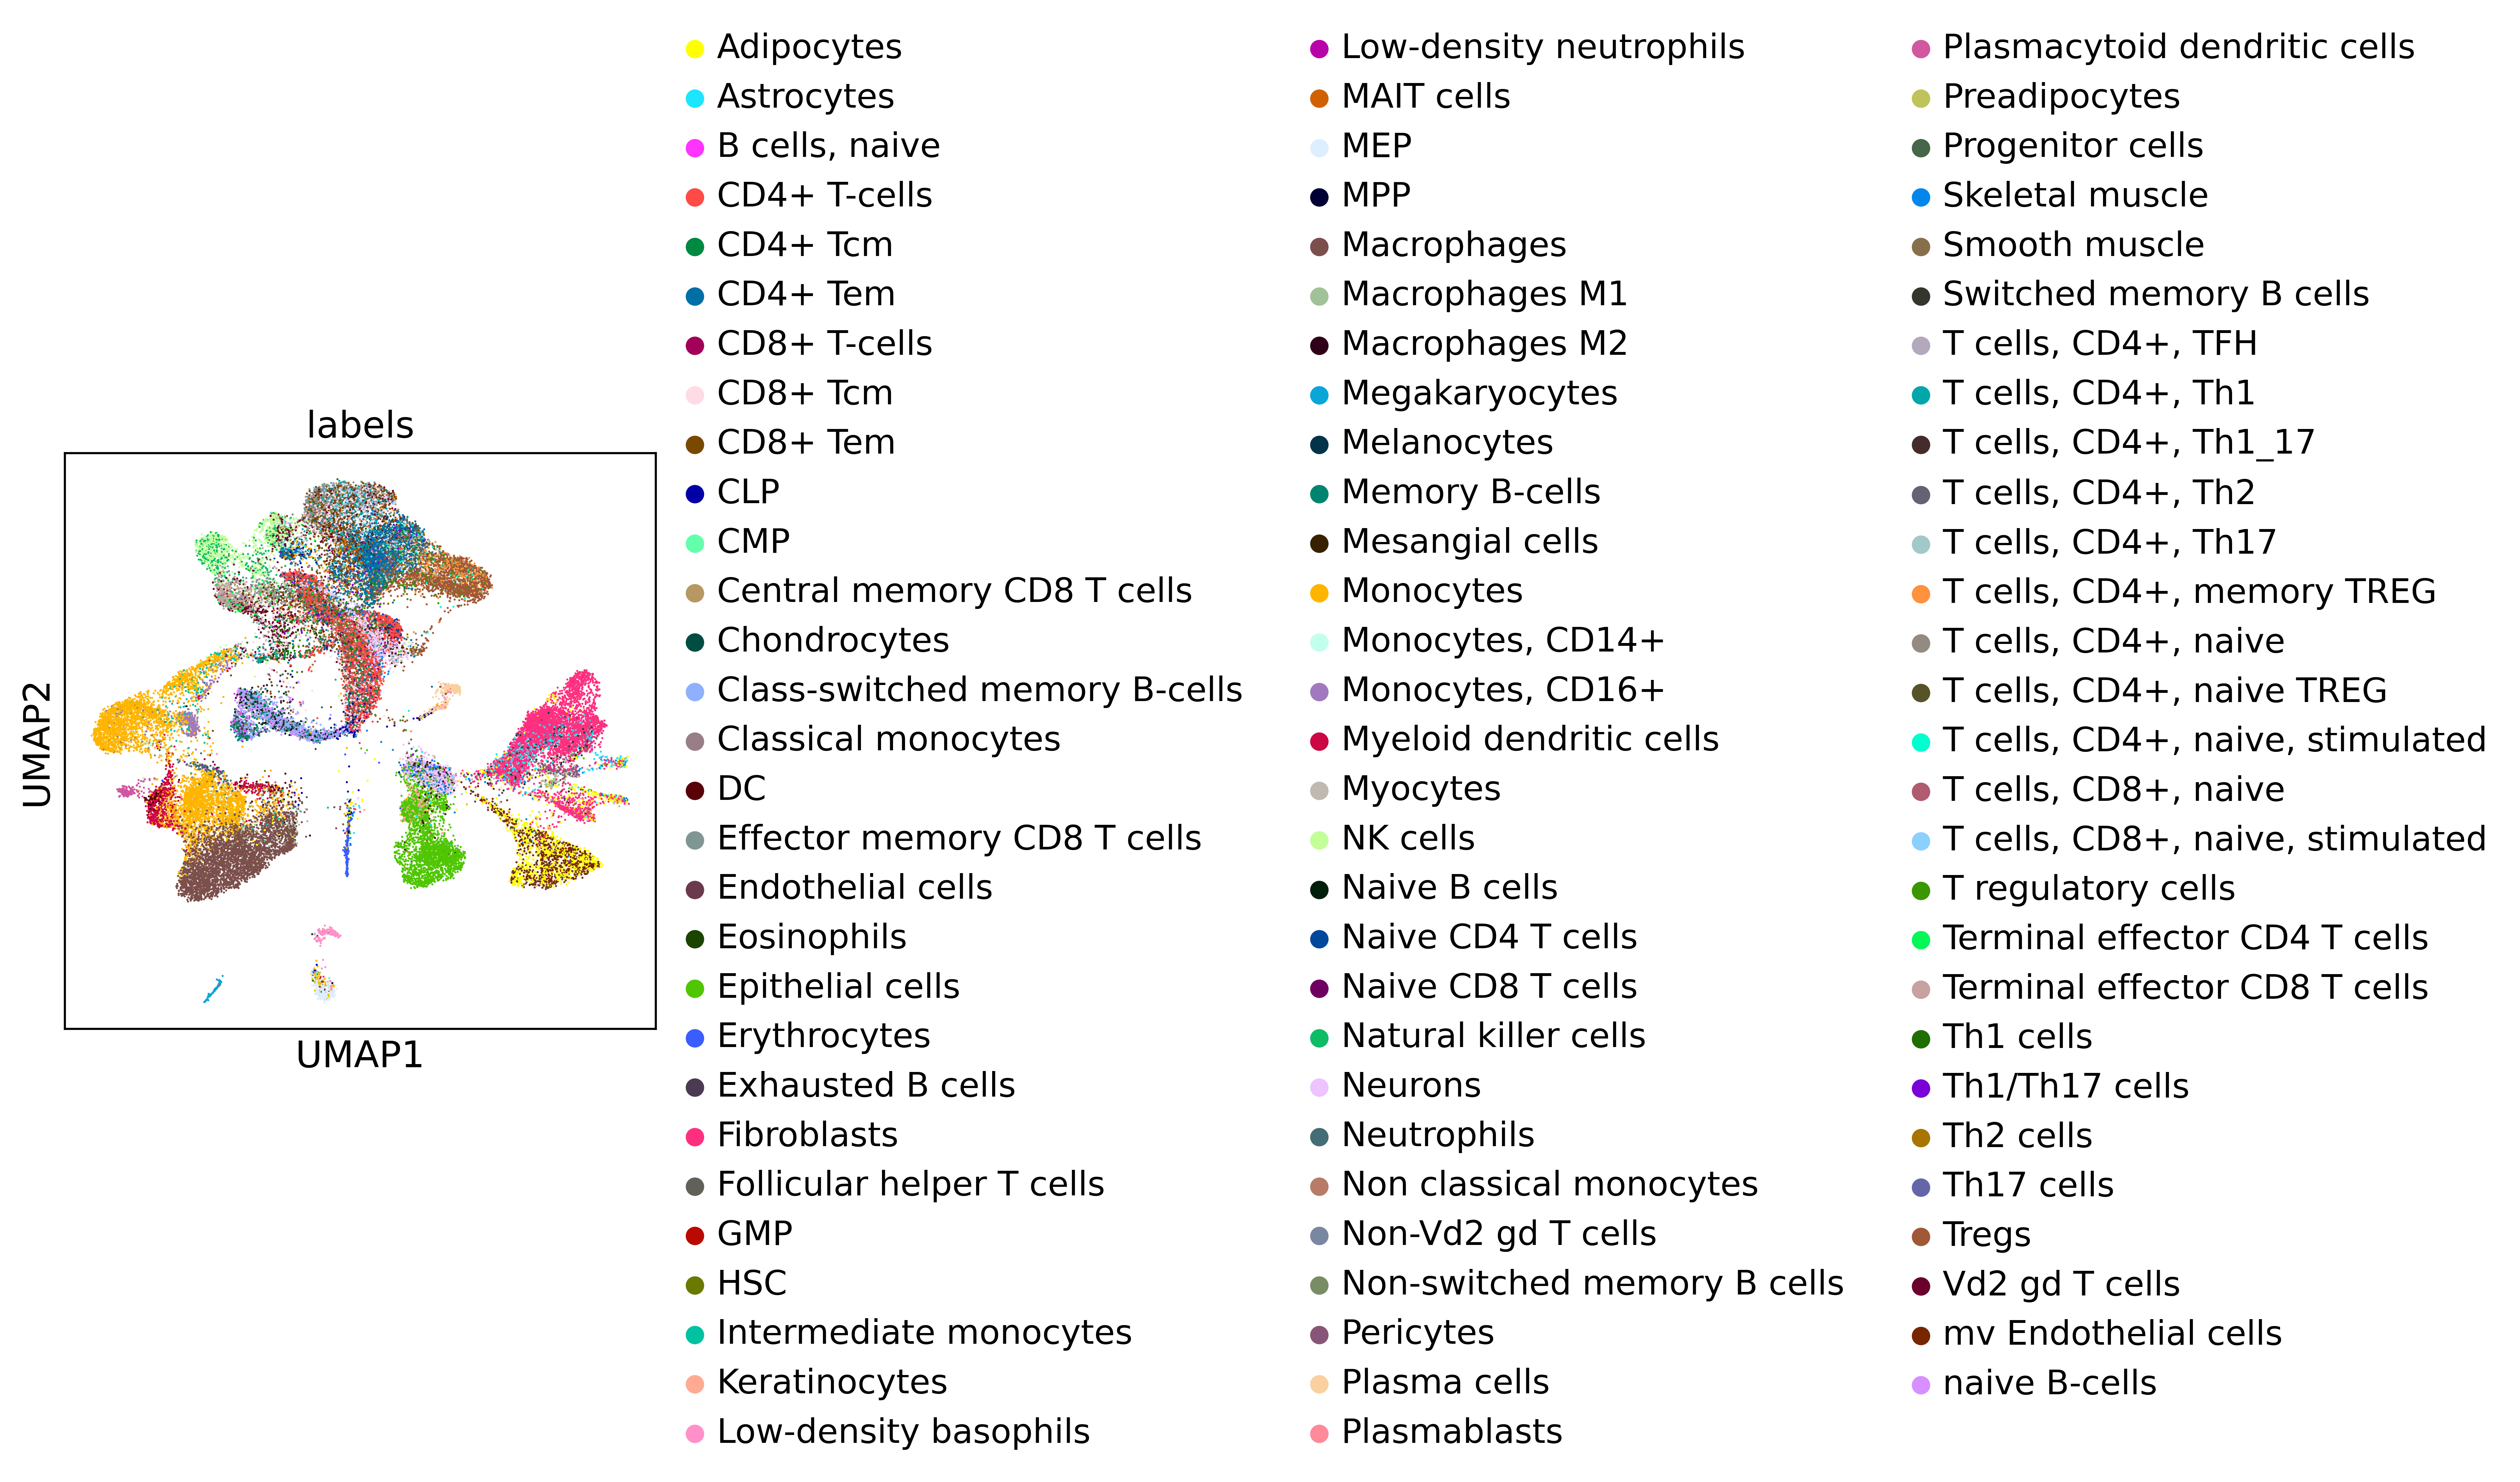

In [45]:
sc.pl.umap(adata, color= "labels",
           save="_" + "labels" + '.png')

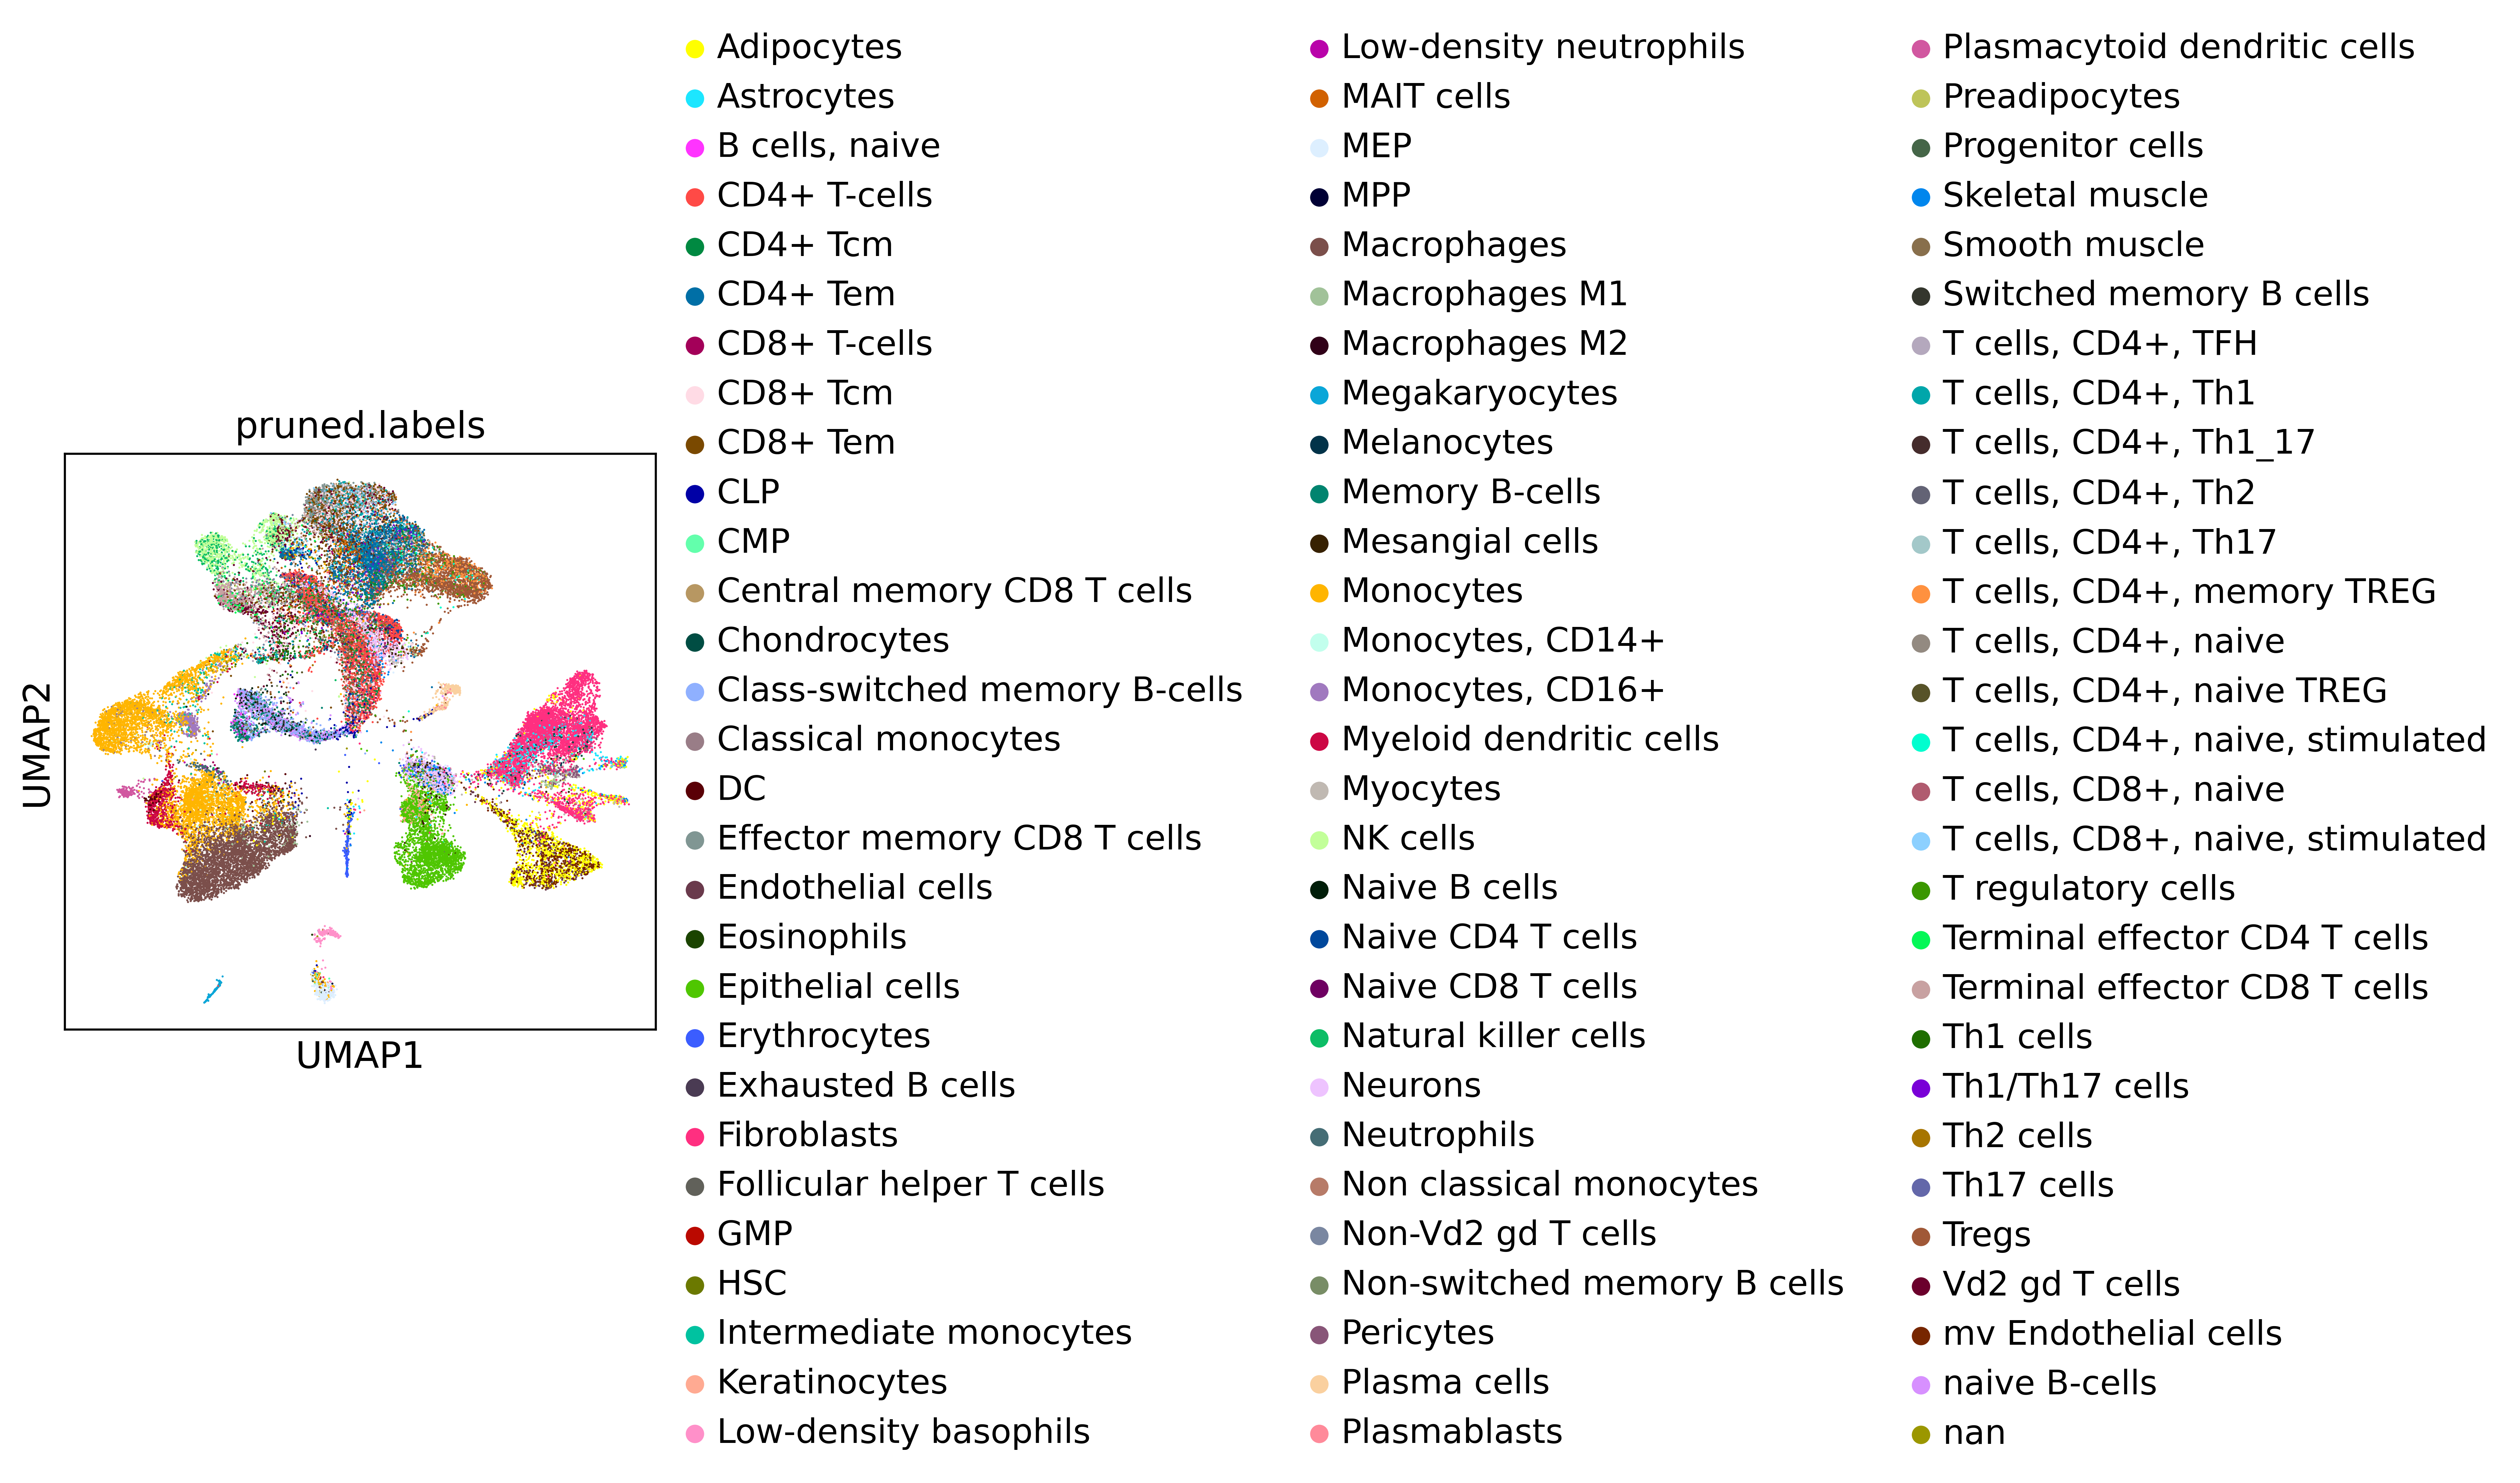

In [46]:
sc.pl.umap(adata, color= "pruned.labels",
           save="_" + "pruned.labels" + '.png')

In [48]:
import anndata2ri
anndata2ri.activate()
%reload_ext rpy2.ipython

In [49]:
%%R
singleR = readRDS("../output/20200914_singleR.rds")

In [53]:
%%R
head(singleR)

                       orig.ident sample patient tissue n_genes_by_counts
AAACCCAAGCACGGAT-1-0-0 PT21713-BT      0 PT21713     BT              1596
AAACCCAAGGACGCAT-1-0-0 PT21713-BT      0 PT21713     BT              1497
AAACCCAAGGGCGAAG-1-0-0 PT21713-BT      0 PT21713     BT              2574
AAACCCACAATACCTG-1-0-0 PT21713-BT      0 PT21713     BT              1073
AAACCCACAATCCTAG-1-0-0 PT21713-BT      0 PT21713     BT              1505
AAACCCAGTCCTGGGT-1-0-0 PT21713-BT      0 PT21713     BT              2766
                       log1p_n_genes_by_counts total_counts log1p_total_counts
AAACCCAAGCACGGAT-1-0-0                7.375882       5699.0  8.648221015930176
AAACCCAAGGACGCAT-1-0-0                7.311886       4049.0  8.306471824645996
AAACCCAAGGGCGAAG-1-0-0                7.853605      12978.0  9.471088409423828
AAACCCACAATACCTG-1-0-0                6.979145       2113.0  7.656337261199951
AAACCCACAATCCTAG-1-0-0                7.317212       3566.0   8.17948055267334
AAACCCAG

In [60]:
%%R
print(table(singleR[,"pruned.labels"]))


                      Adipocytes                       Astrocytes 
                            1522                              593 
                  B cells, naive                     CD4+ T-cells 
                              47                             2578 
                        CD4+ Tcm                         CD4+ Tem 
                             999                             2175 
                    CD8+ T-cells                         CD8+ Tcm 
                             283                             1495 
                        CD8+ Tem       Central memory CD8 T cells 
                            1402                              225 
                    Chondrocytes    Class-switched memory B-cells 
                             130                              862 
             Classical monocytes                              CLP 
                              77                              240 
                             CMP                             

In [ ]:
label = singleR[,"pruned.labels"]